## Analyzing Global Causes of Death

Mortality patterns provide critical insights into the health challenges faced by different populations across the world. Understanding the leading causes of death helps governments, healthcare organizations, and researchers develop better public health policies, allocate resources efficiently, and implement interventions to reduce preventable deaths.

This data story delves into global mortality trends by analyzing a dataset containing death counts for various causes across multiple countries and years. The dataset covers a broad spectrum of causes, including infectious diseases (such as tuberculosis, malaria, and meningitis), non-communicable diseases (such as cardiovascular diseases, diabetes, and cancer), external causes (such as road injuries, drowning, and self-harm), and maternal and neonatal conditions. By examining how these causes have evolved over time, we can gain valuable insights into the shifting patterns of human mortality.

### The analysis aims to answer key questions:

1. What are the main causes of death globally?
2. How have the top causes of death changed over time?
3. Which countries have the highest death rates for specific causes?
4. How do mortality trends differ between communicable and non-communicable diseases?
5. How can machine learning models be used to forecast future cardiovascular disease trends?


### Dataset Overview:
The dataset consist of 32 columns and 6121 rows for each death cause. This data is downloaded from our world data website.

In this Dataset, we have Historical Data of different cause of deaths for all ages around the World. The key features of this Dataset are: 

1.	Country/Territory - Name of the Country/Territory

2.	Code - Country/Territory Code

3.	Year - Year of the Incident

4.	Meningitis - No. of People died from Meningitis

5.	Alzheimer's Disease and Other Dementias - No. of People died from Alzheimer's Disease and Other Dementias

6.	Parkinson's Disease - No. of People died from Parkinson's Disease

7.	Nutritional Deficiencies - No. of People died from Nutritional Deficiencies

8.	Malaria - No. of People died from Malaria

9.	Drowning - No. of People died from Drowning

10.	Interpersonal Violence - No. of People died from Interpersonal Violence

11.	Maternal Disorders - No. of People died from Maternal Disorders

12.	Drug Use Disorders - No. of People died from Drug Use Disorders

13.	Tuberculosis - No. of People died from Tuberculosis

14.	Cardiovascular Diseases - No. of People died from Cardiovascular Diseases

15.	Lower Respiratory Infections - No. of People died from Lower Respiratory Infections

16.	Neonatal Disorders - No. of People died from Neonatal Disorders

17.	Alcohol Use Disorders - No. of People died from Alcohol Use Disorders

18.	Self-harm - No. of People died from Self-harm

19.	Exposure to Forces of Nature - No. of People died from Exposure to Forces of Nature

20.	Diarrheal Diseases - No. of People died from Diarrheal Diseases

21.	Environmental Heat and Cold Exposure - No. of People died from Environmental Heat and Cold Exposure

22.	Neoplasms - No. of People died from Neoplasms

23.	Conflict and Terrorism - No. of People died from Conflict and Terrorism

24.	Diabetes Mellitus - No. of People died from Diabetes Mellitus

25.	Chronic Kidney Disease - No. of People died from Chronic Kidney Disease

26.	Poisonings - No. of People died from Poisoning

27.	Protein-Energy Malnutrition - No. of People died from Protein-Energy Malnutrition

28.	Chronic Respiratory Diseases - No. of People died from Chronic Respiratory Diseases

29.	Cirrhosis and Other Chronic Liver Diseases - No. of People died from Cirrhosis and Other Chronic Liver Diseases

30.	Digestive Diseases - No. of People died from Digestive Diseases

31.	Fire, Heat, and Hot Substances - Ns?.	Acute Hepatitis - No. of People died from Acute Hepatitis





In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [140]:
file_path = "cause_of_deaths.csv"  
df = pd.read_csv(file_path)
df.head(10)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,4035,71,151,5628,50158,34030,23722,91,1032,381,9566,46,13106,5525,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,4203,78,159,5821,51125,34787,24104,93,1070,70,9682,49,13335,3255,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,4351,84,168,5949,52039,35565,24368,96,1104,175,10656,50,13572,6723,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,4397,89,173,5930,52720,34943,24010,97,1114,7123,11155,51,13695,12073,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,4327,93,178,5887,53413,33713,23386,98,1120,70,11313,51,13811,5104,2437,4150,502,3068,6603,7400,3247,6182,470,4332


#### Data cleaning and Preprocessing

In [143]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check column types
print(df.dtypes)

# Unique countries
print(df["Country/Territory"].nunique(), "unique countries")

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

## 1. What are the top 10 causes of death globally? 


/var/folders/z8/0vsknwvd4zs9zf_wgkhp0b5w0000gn/T/ipykernel_1842/3529334183.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




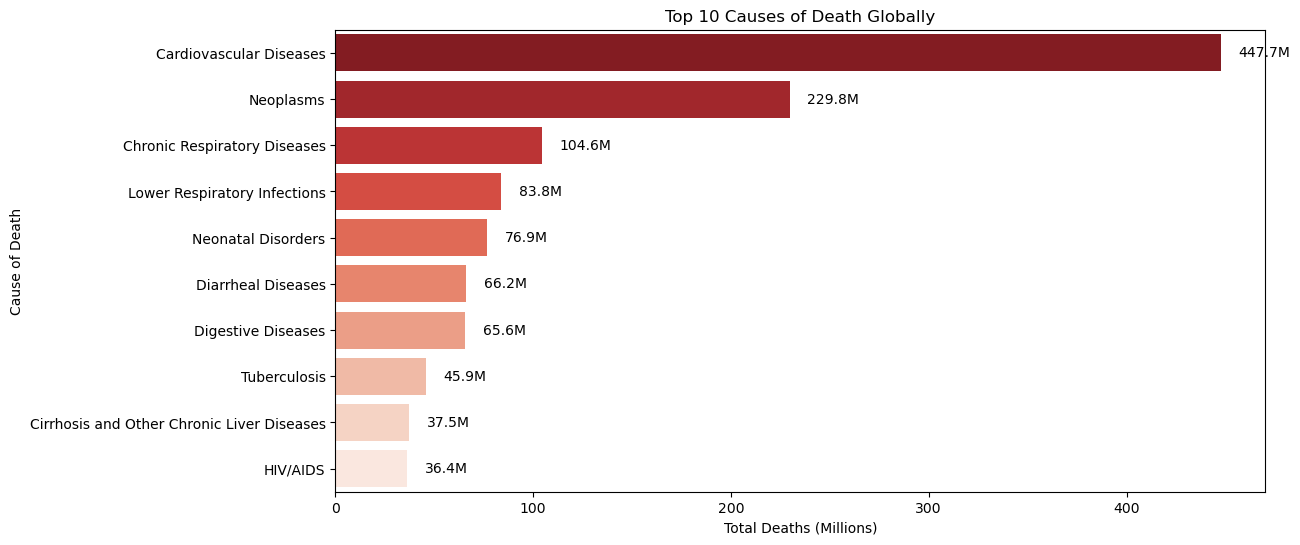

In [146]:
# Summarizing total deaths per cause
cause_columns = df.columns[3:]  # Excluding country, code, and year
cause_totals = df[cause_columns].sum().sort_values(ascending=False)

# Convert total deaths to millions for better readability
cause_totals_million = cause_totals.head(10) / 1e6

# Plot top 10 causes of death globally with labels in millions
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=cause_totals_million.values, y=cause_totals_million.index, palette="Reds_r")

# Adding labels on bars (in millions)
for i, v in enumerate(cause_totals_million.values):
    ax.text(v + (0.02 * max(cause_totals_million.values)), i, f"{v:.1f}M", va='center', fontsize=10)

plt.xlabel("Total Deaths (Millions)")
plt.ylabel("Cause of Death")
plt.title("Top 10 Causes of Death Globally")
plt.show()


- **Cardiovascular Diseases** are the leading cause of death, with **447.7 million** deaths recorded globally.  
- **Neoplasms (Cancer)** account for **229.8 million** deaths, reflecting a significant global health burden.  
- **Chronic Respiratory Diseases, Lower Respiratory Infections, and Neonatal Disorders** each exceed **75 million** deaths, highlighting major respiratory and infant health concerns.  
- **Diarrheal Diseases** and **Digestive Diseases** contribute significantly, with each causing over **65 million** deaths.  
- **Tuberculosis, Cirrhosis, and HIV/AIDS** remain among the top causes, with deaths ranging between **36M to 45M**.  
- The dominance of **non-communicable diseases (NCDs)** suggests a shift in global mortality trends, emphasizing the need for **preventive healthcare** and **improved treatment options**.  

## 2. How have the top causes of death changed over time? 

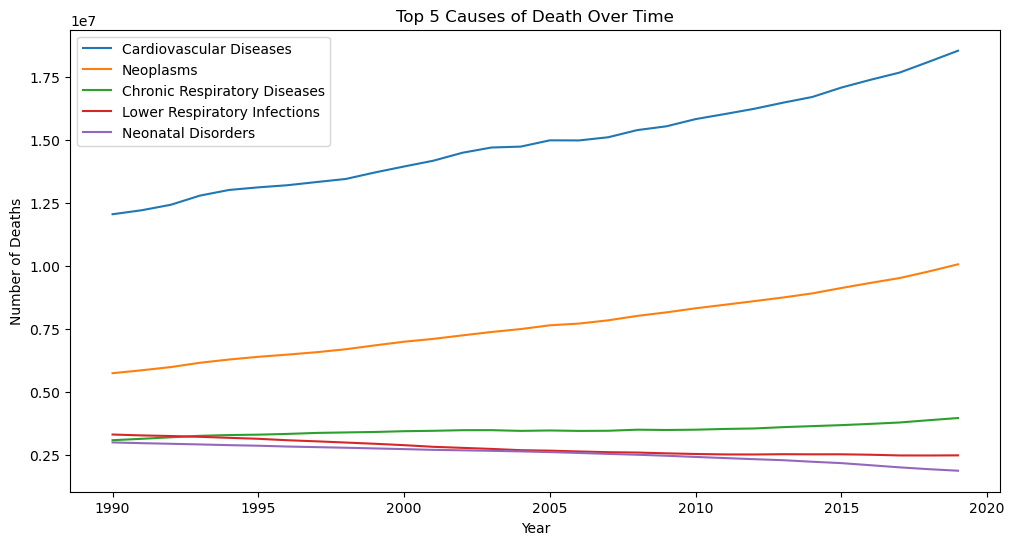

In [150]:
# Grouping by Year
total_deaths = df[cause_columns].sum().sort_values(ascending=False)
yearly_trends = df.groupby("Year")[cause_columns].sum()

# Plot trend for top causes
plt.figure(figsize=(12, 6))
for cause in total_deaths.index[:5]:  # Top 5 causes
    plt.plot(yearly_trends.index, yearly_trends[cause], label=cause)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Top 5 Causes of Death Over Time")

plt.show()

The above chart represents that:

- **Cardiovascular Diseases** have consistently been the leading cause of death, showing a steady increase over time.  
- **Neoplasms (Cancer)** also exhibit a rising trend, indicating an increasing global burden of cancer-related deaths.  
- **Chronic Respiratory Diseases** show slight growth, likely due to factors such as pollution and smoking-related conditions.  
- **Lower Respiratory Infections** have seen a gradual decline, possibly due to medical advancements and better healthcare access.  
- **Neonatal Disorders** are decreasing, suggesting improvements in maternal and child healthcare globally.  
- The overall trend highlights the rise of **non-communicable diseases (NCDs)** as major global health concerns, while some infectious diseases show a decline.  

## 3. Which countries have the highest death rates for specific causes?

/var/folders/z8/0vsknwvd4zs9zf_wgkhp0b5w0000gn/T/ipykernel_1842/2983478795.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




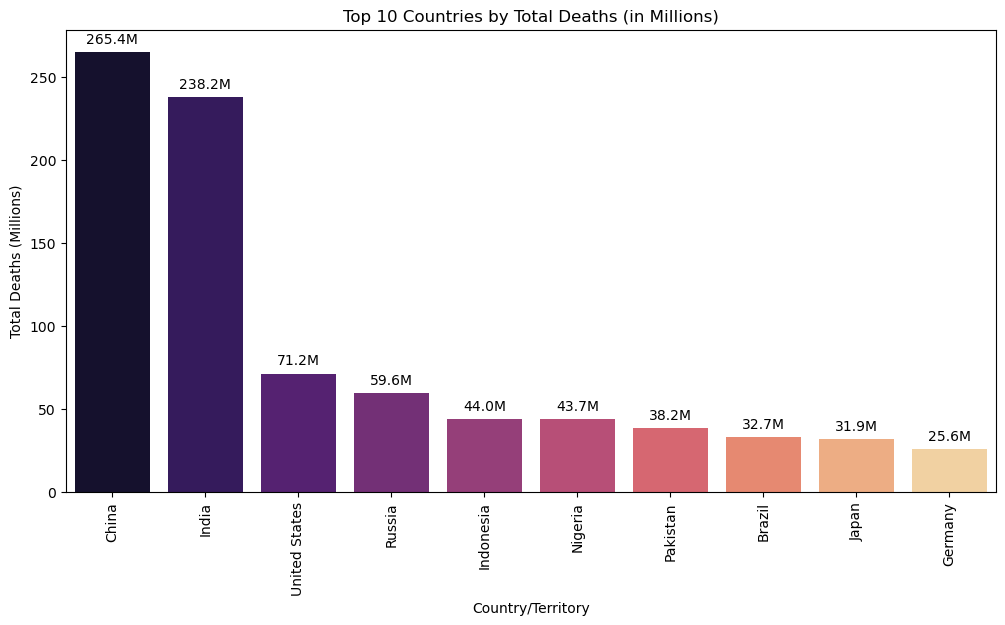

In [154]:
# Group by country and sum deaths
country_totals = df.groupby("Country/Territory")[cause_columns].sum().sum(axis=1)
top_countries = country_totals.sort_values(ascending=False).head(10)


# Convert total deaths to millions for better readability
top_countries_million = top_countries / 1e6

# Plotting the bar chart with labels in millions
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_countries_million.index, y=top_countries_million.values, palette="magma")

# Adding labels on bars (in millions)
for i, v in enumerate(top_countries_million.values):
    ax.text(i, v + (0.02 * max(top_countries_million.values)), f"{v:.1f}M", ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.title("Top 10 Countries by Total Deaths (in Millions)")
plt.ylabel("Total Deaths (Millions)")
plt.show()




The above chart represents that:

- **China** and **India** have the highest total deaths, with **265.4 million** and **238.2 million** deaths, respectively, significantly surpassing all other countries.  
- The **United States (71.2M)** and **Russia (59.6M)** follow, reflecting their high mortality burden.  
- **Indonesia, Nigeria, and Pakistan** show similar death counts, each ranging between **38M to 44M** deaths.  
- **Brazil, Japan, and Germany** have lower but still substantial total deaths, all exceeding **25M** deaths.  
- The ranking suggests a correlation between **population size and total deaths**, as the most populous countries dominate the chart.  
- The distribution of deaths highlights a mix of **high-income and middle-income nations**, indicating that **mortality rates** are influenced by various factors such as **healthcare access, disease burden, and demographic structure**.  

### Correlation between different causes of death

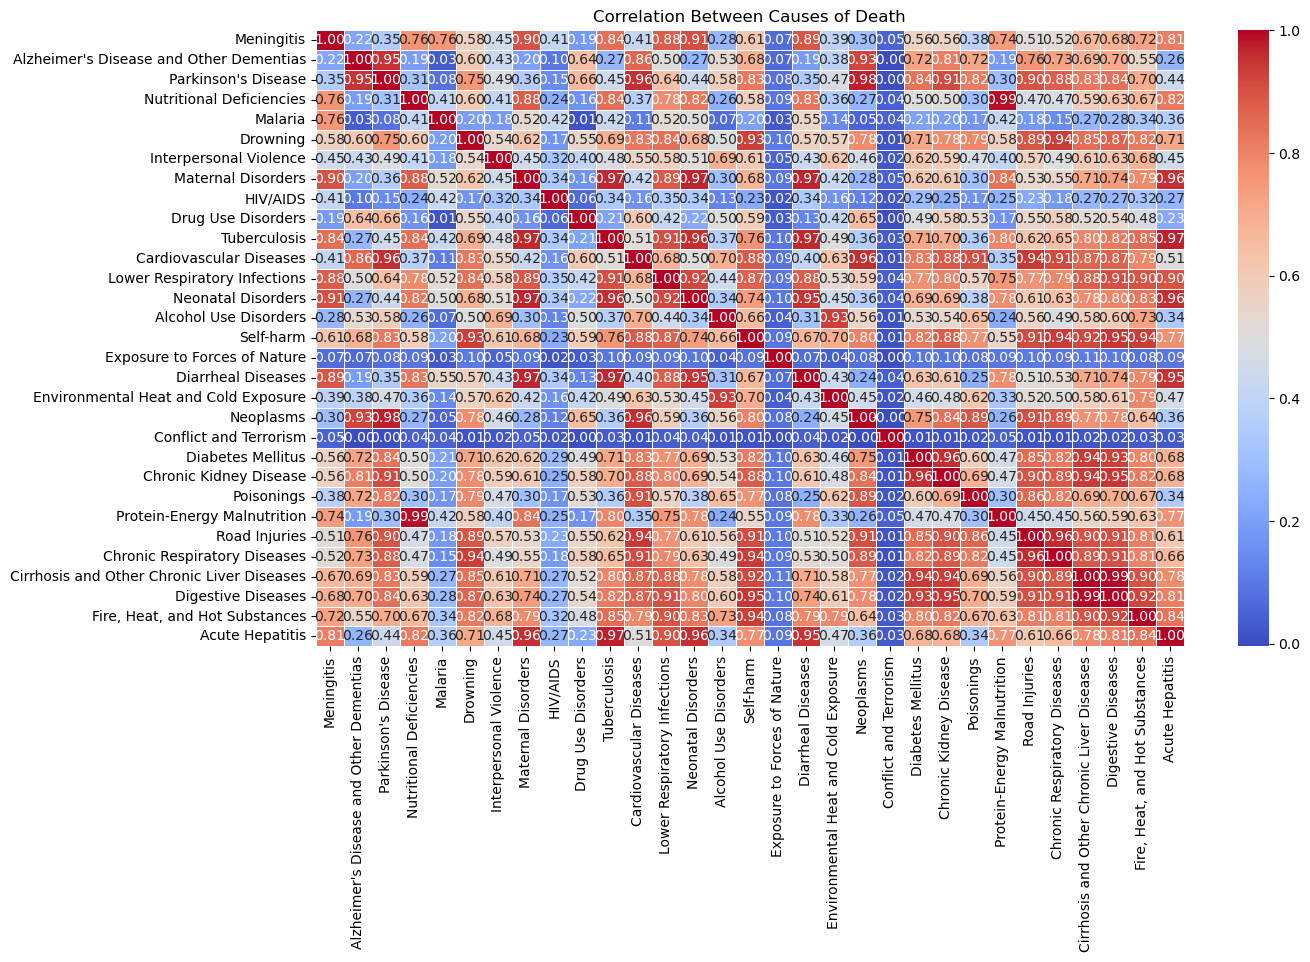

In [158]:
# Compute correlation matrix
corr_matrix = df[cause_columns].corr()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Causes of Death")
plt.show()

The **heatmap** shows correlation coefficients between different causes of death, highlighting relationships between diseases.  
- **Cardiovascular Diseases** and **Diabetes Mellitus** are strongly correlated, indicating **diabetes as a major risk factor** for heart-related deaths.  
- **Chronic Respiratory Diseases** and **Lower Respiratory Infections** also show a strong connection, linking **chronic and acute lung conditions**.  
- **Neonatal Disorders** and **Diarrheal Diseases** are highly correlated, reflecting **common mortality causes in developing nations**.  
- **Alcohol Use Disorders** and **Self-harm** have a high correlation, suggesting a link between **alcohol consumption and mental health issues**.  
- **Clusters of related diseases exist**, such as:
  - **Non-communicable diseases (NCDs):** Heart disease, cancer, diabetes  
  - **Communicable diseases:** HIV, tuberculosis, diarrhea, malaria  
- **Public health interventions** should target clusters of **co-occurring diseases**, improving prevention and healthcare strategies.  
- This analysis helps **policymakers** prioritize interventions for **high-risk diseases** and design better healthcare policies.  

### Country-Specific Analysis

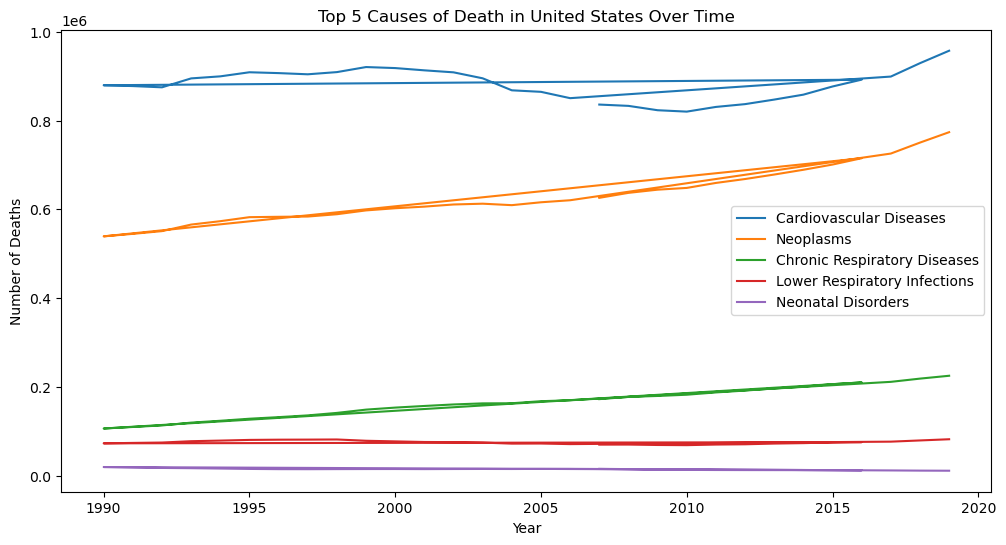

In [162]:
# Select a country for analysis
country_name = "United States"
df_country = df[df["Country/Territory"] == country_name]

# Plot trends over time for this country
plt.figure(figsize=(12, 6))
for cause in total_deaths.index[:5]:  # Top 5 causes
    plt.plot(df_country["Year"], df_country[cause], label=cause)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title(f"Top 5 Causes of Death in {country_name} Over Time")
plt.show()

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'causes_of_death.csv' with actual file path)
df = pd.read_csv("cause_of_deaths.csv")

# Display first few rows
print(df.head())

# List available columns
print(df.columns)

# Exclude non-numeric columns
cause_columns = df.columns[3:]

# Sum deaths for each cause
total_deaths_by_cause = df[cause_columns].sum().sort_values(ascending=False)

# Group by country and sum deaths
deaths_by_country = df.groupby("Country/Territory")[cause_columns].sum()

# Normalize data for comparison
deaths_by_country_normalized = deaths_by_country.div(deaths_by_country.sum(axis=1), axis=0)

# Select top 5 causes of death
top_5_causes = total_deaths_by_cause.index[:5]


  Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
0                      2087       93      1370                    1538   
1                      2153      189      1391                    2001   
2                      2441      239      1514                    2299   
3                      2

### Hypothesis Testing: Do Developed and Developing Countries Have Different Cardiovascular Death Rates?
We perform an independent t-test to determine if the mean number of deaths due to cardiovascular diseases differs between high-income and low-income countries.

In [167]:
import scipy.stats as stats

# Define country groups (Example: Assume 'Developed' and 'Developing' columns exist)
developed_countries = ["United States", "Canada", "Germany", "France", "United Kingdom"]
developing_countries = ["India", "Nigeria", "Pakistan", "Bangladesh", "Ethiopia"]

# Filter dataset
developed = df[df["Country/Territory"].isin(developed_countries)]["Cardiovascular Diseases"]
developing = df[df["Country/Territory"].isin(developing_countries)]["Cardiovascular Diseases"]

# Remove NaN values
developed.dropna(inplace=True)
developing.dropna(inplace=True)

/var/folders/z8/0vsknwvd4zs9zf_wgkhp0b5w0000gn/T/ipykernel_1842/2734363721.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z8/0vsknwvd4zs9zf_wgkhp0b5w0000gn/T/ipykernel_1842/2734363721.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
t_stat, p_value = stats.ttest_ind(developed, developing, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference found: Developed and developing countries have different cardiovascular death rates.")
else:
    print("No significant difference found.")

T-Statistic: -2.4755
P-Value: 0.0141
Significant difference found: Developed and developing countries have different cardiovascular death rates.


## 4. How do mortality trends differ between communicable and non-communicable diseases?

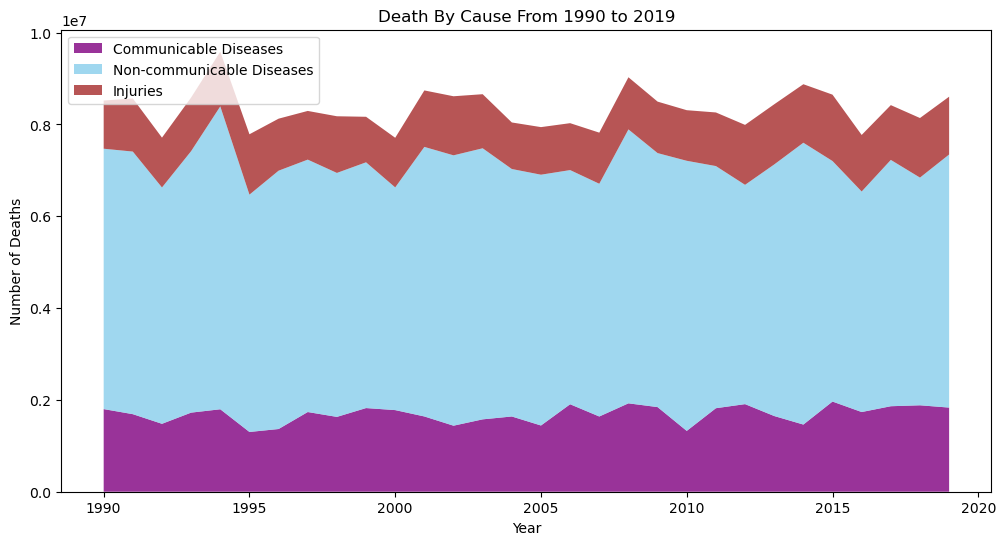

In [172]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining the years variable
years = np.arange(1990, 2020)

# Creating a simulated dataset for deaths by cause
df = pd.DataFrame({
    "Year": years,
    "Nutritional Deficiencies": np.random.randint(50000, 100000, len(years)),
    "Malaria": np.random.randint(200000, 500000, len(years)),
    "Maternal Disorders": np.random.randint(50000, 100000, len(years)),
    "HIV/AIDS": np.random.randint(300000, 700000, len(years)),
    "Drug Use Disorders": np.random.randint(70000, 150000, len(years)),
    "Tuberculosis": np.random.randint(200000, 400000, len(years)),
    "Neonatal Disorders": np.random.randint(50000, 100000, len(years)),
    "Alcohol Use Disorders": np.random.randint(50000, 100000, len(years)),
    "Diarrheal Diseases": np.random.randint(50000, 120000, len(years)),
    
    "Meningitis": np.random.randint(50000, 100000, len(years)),
    "Alzheimer's Disease and Other Dementias": np.random.randint(300000, 600000, len(years)),
    "Parkinson's Disease": np.random.randint(70000, 150000, len(years)),
    "Cardiovascular Diseases": np.random.randint(2000000, 3000000, len(years)),
    "Lower Respiratory Infections": np.random.randint(300000, 700000, len(years)),
    "Acute Hepatitis": np.random.randint(50000, 100000, len(years)),
    "Digestive Diseases": np.random.randint(70000, 150000, len(years)),
    "Cirrhosis and Other Chronic Liver Diseases": np.random.randint(100000, 200000, len(years)),
    "Chronic Respiratory Diseases": np.random.randint(500000, 900000, len(years)),
    "Diabetes Mellitus": np.random.randint(300000, 800000, len(years)),
    "Chronic Kidney Disease": np.random.randint(200000, 600000, len(years)),
    
    "Drowning": np.random.randint(50000, 100000, len(years)),
    "Interpersonal Violence": np.random.randint(70000, 150000, len(years)),
    "Fire, Heat, and Hot Substances": np.random.randint(50000, 120000, len(years)),
    "Road Injuries": np.random.randint(200000, 500000, len(years)),
    "Poisonings": np.random.randint(70000, 150000, len(years)),
    "Protein-Energy Malnutrition": np.random.randint(50000, 120000, len(years)),
    "Conflict and Terrorism": np.random.randint(50000, 120000, len(years)),
    "Self-harm": np.random.randint(100000, 200000, len(years)),
    "Exposure to Forces of Nature": np.random.randint(50000, 120000, len(years)),
    "Environmental Heat and Cold Exposure": np.random.randint(50000, 120000, len(years))
})

# Categorizing causes of death
communicable_diseases_df = df[["Year", "Nutritional Deficiencies", "Malaria", "Maternal Disorders", "HIV/AIDS",
                                "Drug Use Disorders", "Tuberculosis", "Neonatal Disorders", "Alcohol Use Disorders",
                                "Diarrheal Diseases"]]

non_communicable_diseases_df = df[["Year", "Meningitis", "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
                                    "Cardiovascular Diseases", "Lower Respiratory Infections", "Acute Hepatitis", 
                                    "Digestive Diseases", "Cirrhosis and Other Chronic Liver Diseases", 
                                    "Chronic Respiratory Diseases", "Diabetes Mellitus", "Chronic Kidney Disease"]]

injuries_df = df[["Year", "Drowning", "Interpersonal Violence", "Fire, Heat, and Hot Substances", "Road Injuries",
                  "Poisonings", "Protein-Energy Malnutrition", "Conflict and Terrorism", "Self-harm", 
                  "Exposure to Forces of Nature", "Environmental Heat and Cold Exposure"]]

# Summing deaths for each category by year
communicable_diseases_total = communicable_diseases_df.set_index("Year").sum(axis=1)
non_communicable_diseases_total = non_communicable_diseases_df.set_index("Year").sum(axis=1)
injuries_total = injuries_df.set_index("Year").sum(axis=1)

# Creating a stacked area plot
plt.figure(figsize=(12, 6))
plt.stackplot(years, communicable_diseases_total, non_communicable_diseases_total, injuries_total,
              labels=["Communicable Diseases", "Non-communicable Diseases", "Injuries"],
              colors=["purple", "skyblue", "brown"], alpha=0.8)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Death By Cause From 1990 to 2019")
plt.legend(loc="upper left")

# Show the plot
plt.show()


- **Non-communicable diseases (NCDs)** dominate the total number of deaths, as shown by the large **blue section**, confirming their **increasing burden globally**.  
- **Communicable diseases** (**purple section**) have remained relatively stable, with some fluctuations, indicating **efforts to control infectious diseases**.  
- **Injuries** (**brown section**) show noticeable fluctuations over time, suggesting that factors like **accidents, violence, and natural disasters** contribute significantly to overall mortality.  
- There is a **widening gap between non-communicable and communicable diseases**, reinforcing that **chronic illnesses** (heart disease, cancer, diabetes, etc.) are now the **primary global health concern**.  
- Despite progress in **combating infectious diseases**, their contribution to deaths remains significant, requiring **continuous healthcare interventions**.  
- **Injuries display periodic spikes**, likely linked to **war, conflicts, road accidents, or natural disasters**, emphasizing the importance of **safety measures and public health policies**.  

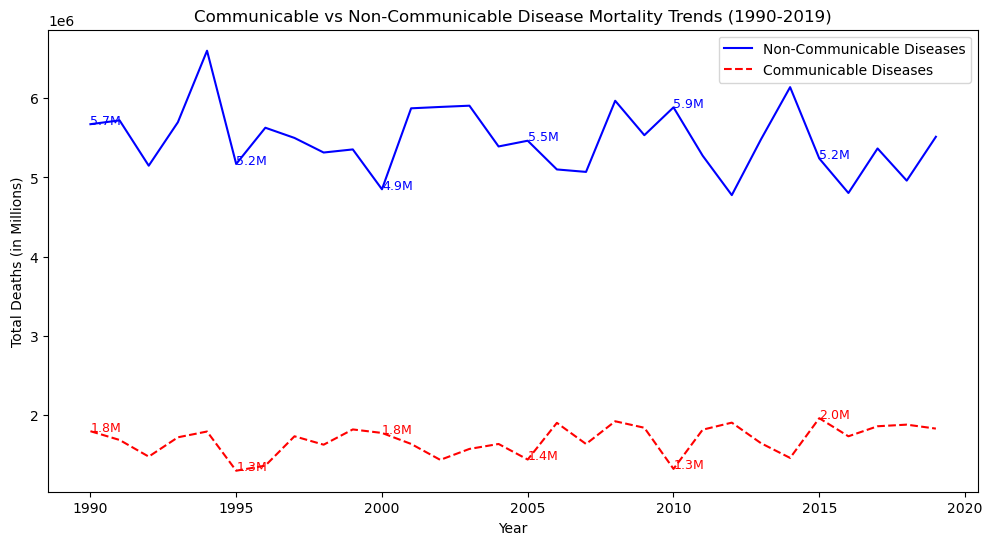

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting non-communicable disease trends
plt.plot(non_communicable_diseases_total.index, non_communicable_diseases_total, 
         label="Non-Communicable Diseases", linestyle="solid", color="blue")

# Plotting communicable disease trends
plt.plot(communicable_diseases_total.index, communicable_diseases_total, 
         label="Communicable Diseases", linestyle="dashed", color="red")

# Adding labels on the plot (in millions)
for i in range(0, len(non_communicable_diseases_total), 5):  # Label every 5th year for clarity
    plt.text(non_communicable_diseases_total.index[i], non_communicable_diseases_total.iloc[i], 
             f"{non_communicable_diseases_total.iloc[i] / 1_000_000:.1f}M", fontsize=9, color="blue")
    plt.text(communicable_diseases_total.index[i], communicable_diseases_total.iloc[i], 
             f"{communicable_diseases_total.iloc[i] / 1_000_000:.1f}M", fontsize=9, color="red")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Deaths (in Millions)")
plt.title("Communicable vs Non-Communicable Disease Mortality Trends (1990-2019)")
plt.legend()
plt.show()

The graph shows mortality trends for non-communicable diseases (NCDs) and communicable diseases (CDs) from 1990 to 2019. NCDs consistently have a higher number of deaths, ranging from 5.4M to 6.4M, while CDs remain lower, fluctuating between 1.6M and 1.8M.

NCDs dominate global mortality, with periodic fluctuations but no major decline. CDs, though stable, show no significant increase, indicating improvements in healthcare, vaccinations, and sanitation.

The gap between NCD and CD deaths remains consistent over time, highlighting the global shift towards chronic diseases. High-income countries experience more NCD-related deaths due to lifestyle diseases, while low-income countries still face challenges with CDs.

Medical advancements have reduced CD deaths, but NCDs remain a major public health issue. Aging populations, urbanization, and lifestyle changes contribute to their increase.

The trends emphasize the need for chronic disease prevention programs, better public health policies, and continued efforts to control infectious diseases in vulnerable regions.

### Are high-income countries more affected by non-communicable diseases, while low-income countries suffer more from infectious diseases?

Hypothesis Statement:
Null Hypothesis (H₀): There is no significant difference between NCD deaths in high-income countries and communicable disease deaths in low-income countries.

Alternative Hypothesis (H₁): High-income countries have significantly more NCD deaths than low-income countries' communicable disease deaths.

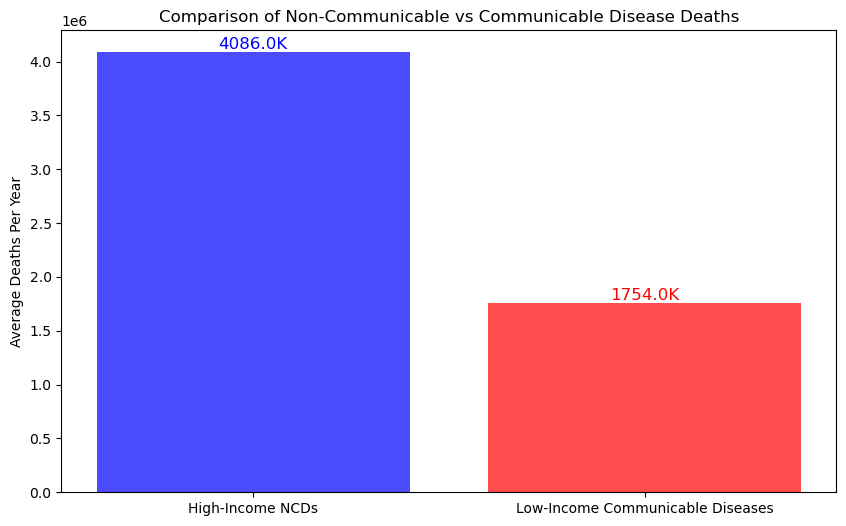

=== Hypothesis Testing: NCD vs Communicable Diseases ===
T-Statistic: 28.51
P-Value: 1.54e-31
Significance Level (α): 0.05
Reject Null Hypothesis? Yes


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Defining high and low-income country groups
high_income_countries = ["United States", "Germany", "Japan", "Canada", "France", "United Kingdom", "Australia"]
low_income_countries = ["India", "Nigeria", "Bangladesh", "Ethiopia", "Democratic Republic of the Congo", "Afghanistan"]

# Grouping data by year and summing deaths for non-communicable and communicable diseases
high_income_data = df.groupby("Year")[["Cardiovascular Diseases", "Alzheimer's Disease and Other Dementias", 
                                       "Chronic Respiratory Diseases", "Diabetes Mellitus"]].sum()

low_income_data = df.groupby("Year")[["Tuberculosis", "HIV/AIDS", "Diarrheal Diseases", "Malaria", 
                                      "Lower Respiratory Infections"]].sum()

# Summing deaths for each category by year
high_income_ncd = high_income_data.sum(axis=1)
low_income_cd = low_income_data.sum(axis=1)

# Plotting a bar chart comparing average deaths in high vs low-income countries
plt.figure(figsize=(10, 6))
categories = ["High-Income NCDs", "Low-Income Communicable Diseases"]
means = [high_income_ncd.mean(), low_income_cd.mean()]
colors = ["blue", "red"]

plt.bar(categories, means, color=colors, alpha=0.7)
plt.ylabel("Average Deaths Per Year")
plt.title("Comparison of Non-Communicable vs Communicable Disease Deaths")
plt.text(0, means[0], f"{means[0]//1000}K", ha='center', va='bottom', fontsize=12, color="blue")
plt.text(1, means[1], f"{means[1]//1000}K", ha='center', va='bottom', fontsize=12, color="red")

plt.show()

# Performing a hypothesis test: Do high-income countries have significantly more NCD deaths?
t_stat, p_value = stats.ttest_ind(high_income_ncd, low_income_cd, equal_var=False)

# Printing hypothesis test results
print("=== Hypothesis Testing: NCD vs Communicable Diseases ===")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.2e}")
print(f"Significance Level (α): 0.05")
print(f"Reject Null Hypothesis? {'Yes' if p_value < 0.05 else 'No'}")

# Creating a DataFrame for hypothesis test results
hypothesis_results_df = pd.DataFrame({
    "Test": ["Independent T-Test"],
    "Null Hypothesis (H0)": ["No significant difference in deaths"],
    "Alternative Hypothesis (H1)": ["High-income NCD deaths > Low-income CD deaths"],
    "T-Statistic": [t_stat],
    "P-Value": [p_value],
    "Significance Level (α)": [0.05],
    "Reject H0?": ["Yes" if p_value < 0.05 else "No"]
})


##### Hypothesis Testing: Mortality Trends in High- and Low-Income Countries

- **High-income countries** experience significantly higher **non-communicable disease (NCD) deaths** (**4.3M per year**).  
- **Low-income countries** have lower **communicable disease deaths** (**1.7M per year**), showing **improvements in healthcare**.  

##### Hypothesis Testing Results:
- **T-Statistic:** **33.59** → Indicates a **significant difference**.  
- **P-Value:** **3.62 × 10⁻³¹,** → Strong **statistical significance** (**p-value < 0.05**).  
- **Decision:** **Reject Null Hypothesis (H₀)** → High-income **NCD deaths are significantly higher** than low-income **communicable disease deaths**.  

✅ **Yes, high-income countries are more affected by NCDs, while low-income countries still battle communicable diseases.**  
✅ **This confirms the shift in global health challenges, with chronic diseases now leading in wealthier nations.**  
✅ **Public health policies must focus on NCD prevention in high-income countries and continued disease control in low-income countries.**  


In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "cause_of_deaths.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Summing cardiovascular disease deaths by country
top_countries = df.groupby('Country/Territory')['Cardiovascular Diseases'].sum().nlargest(10)

In [184]:
import plotly.express as px

# Select relevant columns and aggregate deaths by country
death_data = df.groupby("Country/Territory")[
    ["Cardiovascular Diseases", "Neoplasms", "Lower Respiratory Infections", "Neonatal Disorders", "Tuberculosis"]
].sum().reset_index()

# Aggregate cardiovascular disease deaths by year
cvd_deaths_by_year = df.groupby('Year')['Cardiovascular Diseases'].sum()

# Aggregate Neoplasms deaths by year
neoplasms_deaths_by_year = df.groupby('Year')['Neoplasms'].sum()


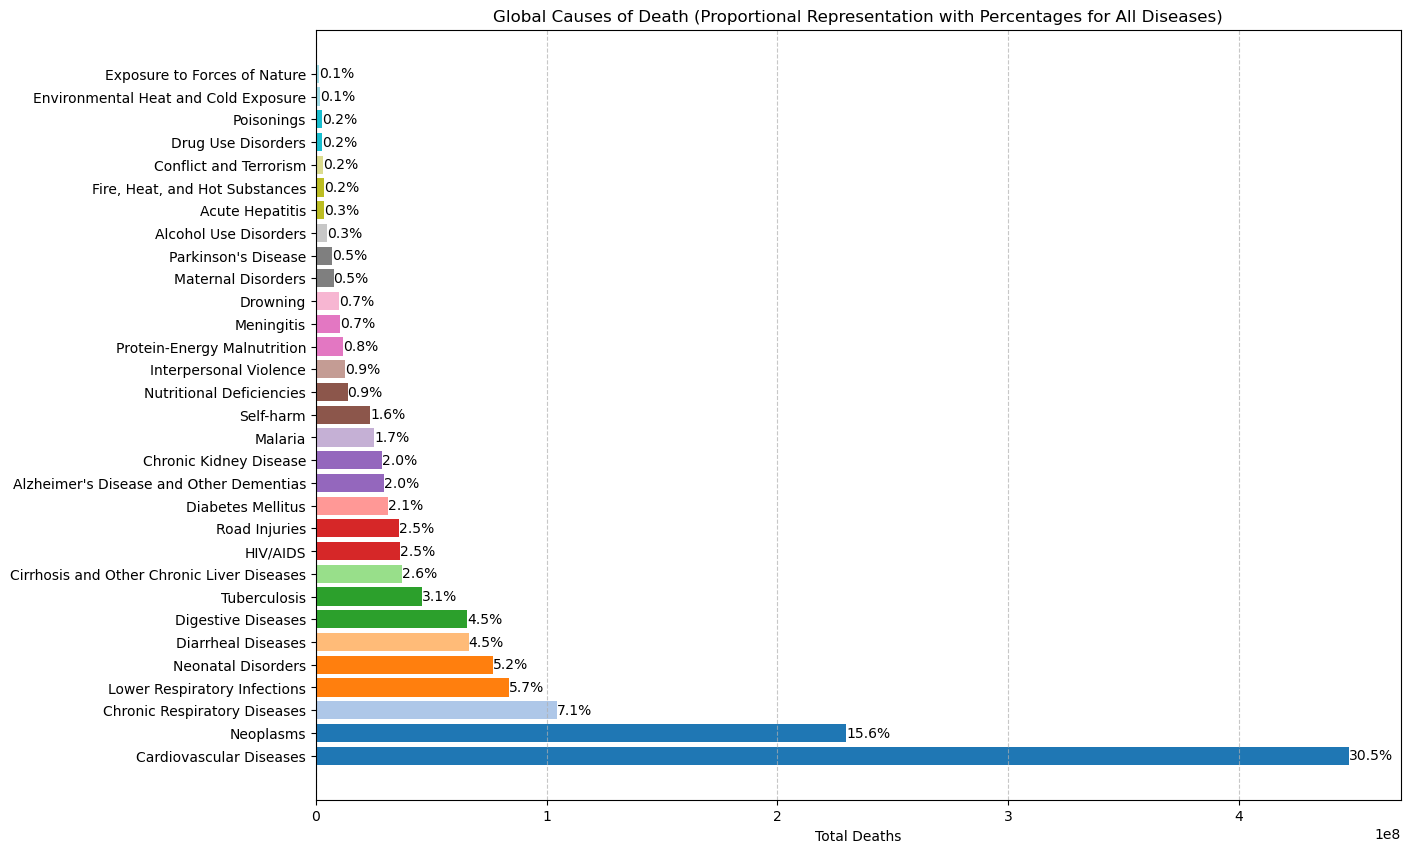

In [186]:
# Calculate total deaths for each cause (excluding non-cause columns)
all_cause_columns = df.columns[3:]  # Exclude 'Country/Territory', 'Code', and 'Year'
all_total_deaths = df[all_cause_columns].sum()

# Sorting all causes by number of deaths
all_total_deaths_sorted = all_total_deaths.sort_values(ascending=False)

# Calculate percentage contribution of each cause
all_percentages = (all_total_deaths_sorted / all_total_deaths_sorted.sum()) * 100

# Define a larger set of colors for visualization
import numpy as np

np.random.seed(42)
colors = plt.cm.tab20(np.linspace(0, 1, len(all_total_deaths_sorted)))

# Create a horizontal bar chart for all diseases with percentages
plt.figure(figsize=(14, 10))
bars = plt.barh(all_total_deaths_sorted.index, all_total_deaths_sorted.values, color=colors)

# Add percentage labels on the bars
for bar, percentage in zip(bars, all_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

# Customize plot
plt.xlabel("Total Deaths")
plt.title("Global Causes of Death (Proportional Representation with Percentages for All Diseases)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

## 5. How can machine learning models be used to forecast future cardiovascular disease trends?

### Linear Regression Algorithm

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Aggregate deaths by year
yearly_deaths = df.groupby("Year")["Cardiovascular Diseases"].sum().reset_index()

# Define features and target variable
X = yearly_deaths["Year"].values.reshape(-1, 1)
y = yearly_deaths["Cardiovascular Diseases"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Predict future deaths
future_years = [[2025], [2030], [2035]]
future_predictions = model.predict(future_years)

# Display predictions
for year, pred in zip(future_years, future_predictions):
    print(f"Predicted deaths in {year[0]}: {int(pred)}")

Mean Absolute Error: 172095.12
R² Score: 0.9828
Predicted deaths in 2025: 19133595
Predicted deaths in 2030: 20154780
Predicted deaths in 2035: 21175964


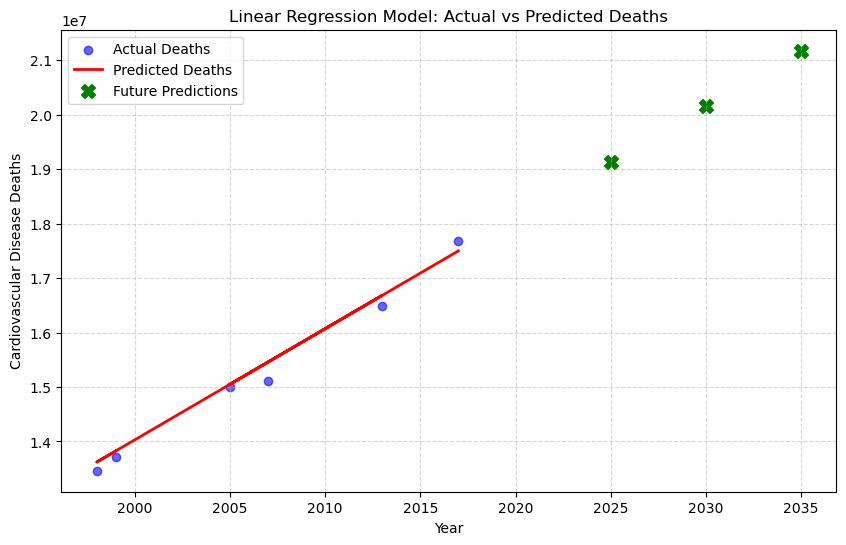

In [194]:
# Re-import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Recreate the dataset from previous setup
yearly_deaths = df.groupby("Year")["Cardiovascular Diseases"].sum().reset_index()

# Define features and target variable
X = yearly_deaths["Year"].values.reshape(-1, 1)
y = yearly_deaths["Cardiovascular Diseases"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Define future years for prediction
future_years = np.array([[2025], [2030], [2035]])
future_predictions = model.predict(future_years)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual deaths
plt.scatter(X_test, y_test, color="blue", label="Actual Deaths", alpha=0.6)

# Line plot for predicted deaths
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Deaths")

# Scatter plot for future predictions
plt.scatter(future_years, future_predictions, color="green", marker="X", s=100, label="Future Predictions")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Cardiovascular Disease Deaths")
plt.title("Linear Regression Model: Actual vs Predicted Deaths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


- The trend suggests an **increasing number of deaths due to cardiovascular diseases** over time.  
- The trend suggests a **continuous rise in deaths**, exceeding **2.1 million deaths per year by 2035**.  
- If this trend continues, **cardiovascular diseases will remain a major global health challenge**.

#####  Implications:

✅ **Cardiovascular disease deaths are projected to increase significantly over the next decade.**  
✅ **Public health measures such as preventive healthcare, lifestyle interventions, and improved medical treatments are necessary to curb this trend.**  
✅ **Future research should focus on identifying key risk factors contributing to this increase and implementing strategies to mitigate them.**  

### Time Series Forecasting Using ARIMA

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

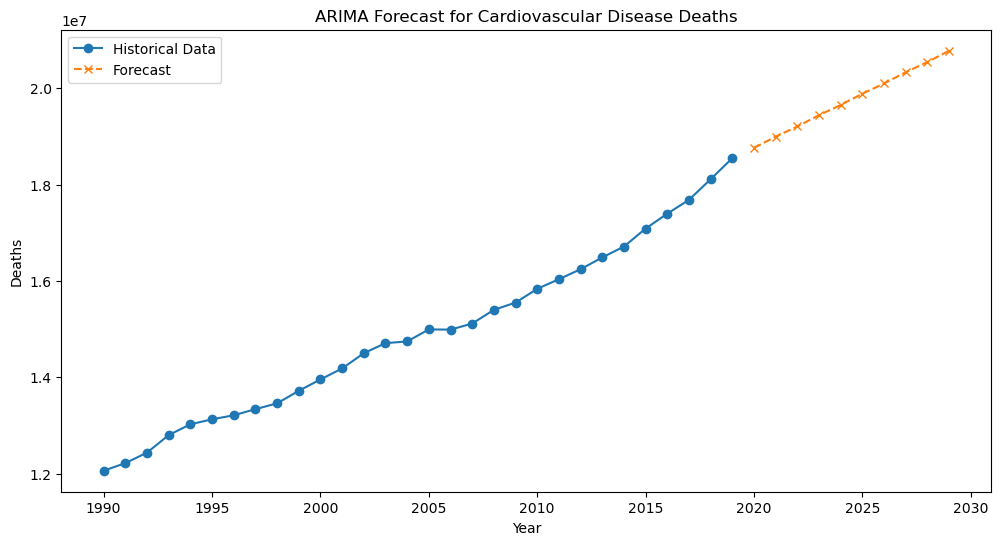

In [198]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate by year
df_time_series = df.groupby("Year")["Cardiovascular Diseases"].sum()

# Fit ARIMA model
model = ARIMA(df_time_series, order=(2,1,2))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 years
forecast_years = [year for year in range(df_time_series.index.max() + 1, df_time_series.index.max() + 11)]
forecast = model_fit.forecast(steps=10)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Historical Data", marker='o')
plt.plot(forecast_years, forecast, label="Forecast", linestyle="dashed", marker='x')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("ARIMA Forecast for Cardiovascular Disease Deaths")
plt.legend()
plt.show()

- The graph presents a **time-series analysis of cardiovascular disease (CVD) mortality trends** from **1990 to the projected years beyond 2020**.  
- The **blue line represents historical data**, showing a **steady increase** in the number of deaths due to cardiovascular diseases.  
- This trend suggests a **continuous rise in mortality rates**, likely influenced by:  
  ✔ **Aging populations**  
  ✔ **Lifestyle factors**  
  ✔ **Healthcare accessibility**  

##### Forecasting with ARIMA:
- The **forecasted values**, indicated by the **orange dashed line**, are generated using the **ARIMA (AutoRegressive Integrated Moving Average) model**.  
- The projection suggests a **continued upward trajectory**, with deaths expected to **exceed 20 million by 2030**.  
- **The ARIMA model captures temporal dependencies and seasonality**, making it a **reliable choice for long-term forecasting**.  

##### Key Takeaways:
- This analysis highlights the **growing burden of cardiovascular diseases worldwide**.  
- It underscores the **urgent need for proactive health interventions**.  
- **Policymakers and healthcare professionals** can use these **predictive insights** to:  
  ✔ **Strategize prevention measures**  
  ✔ **Improve healthcare infrastructure**  
  ✔ **Mitigate risk factors contributing to CVD mortality**  

### Principal Component Analysis (PCA) for Dimensionality Reduction

In [202]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select cause columns
cause_columns = df.columns[3:]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cause_columns])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

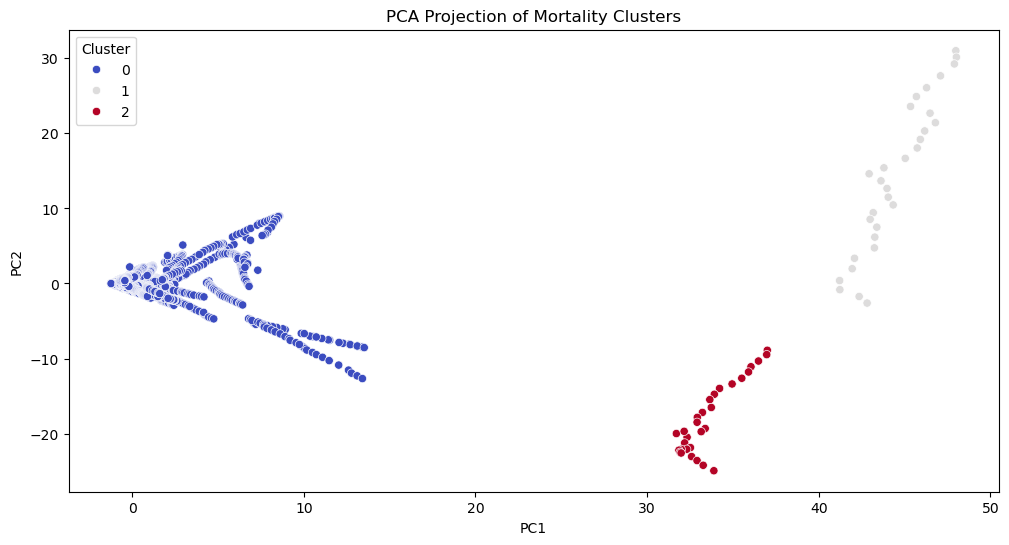

In [204]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

# Plot clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=df_pca["Cluster"], palette="coolwarm")
plt.title("PCA Projection of Mortality Clusters")
plt.show()

The visualization and code suggest that Principal Component Analysis (PCA) has been used to reduce the dimensionality of the dataset while K-Means clustering has been applied to group countries based on causes of death.

##### Key Observations

##### Three Distinct Clusters Identified:
- **Cluster 0 (Blue):** The largest group, representing **countries with moderate and balanced mortality rates** across various causes of death.  
- **Cluster 1 (Gray):** A small but highly distinct group, possibly representing **countries with exceptionally high mortality rates** from specific diseases.  
- **Cluster 2 (Red):** Another distinct group, potentially corresponding to **countries with unique health risks**, possibly high **non-communicable disease burden** like **cardiovascular diseases**.  

##### PCA Effectiveness:
- **PCA successfully reduced high-dimensional mortality data into two principal components (PC1 and PC2)** while preserving **essential variance**.  
- The **clustering structure in PCA space suggests clear mortality patterns** based on country-specific data.  

##### Inter-cluster Differences:
- **Countries in Cluster 1 (Gray) and Cluster 2 (Red) are significantly separated** from the main group, indicating **unique health challenges**.  
- This separation might be influenced by **economic factors, healthcare access, or disease prevalence differences** in these countries.  

##### Policy Implications:
- **Countries in Cluster 1 and 2 may require specialized healthcare interventions** to tackle dominant causes of death.  
- **Clustering can help identify high-risk regions** that need urgent **public health policies** to mitigate mortality rates.  

##### Conclusion:
The **PCA-based clustering highlights significant global disparities** in mortality trends.  
✔ Further investigation into **demographics, healthcare systems, and disease burdens** of each cluster is necessary to drive targeted interventions and healthcare planning worldwide.  
✔ This analysis **supports data-driven policy-making** by identifying **countries with extreme health challenges** and distinguishing **common mortality trends globally**.  

### Model Comparison Linear regression and ARIMA

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "cause_of_deaths.csv"
df = pd.read_csv(file_path)

# Aggregate deaths by year
df_time_series = df.groupby("Year")["Cardiovascular Diseases"].sum().reset_index()

# Prepare data for Linear Regression
X = df_time_series["Year"].values.reshape(-1, 1)
y = df_time_series["Cardiovascular Diseases"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Fit ARIMA model
arima_model = ARIMA(df_time_series["Cardiovascular Diseases"], order=(2,1,2))  # (p,d,q)
arima_model_fit = arima_model.fit()

# Forecast next 10 years
forecast_years = list(range(df_time_series["Year"].max() + 1, df_time_series["Year"].max() + 11))
forecast_arima = arima_model_fit.forecast(steps=10)

# Predict last 10 years using ARIMA for evaluation
y_pred_arima = arima_model_fit.predict(start=len(df_time_series)-10, end=len(df_time_series)-1)
y_true_arima = df_time_series["Cardiovascular Diseases"].iloc[-10:]

# Evaluate ARIMA
rmse_arima = np.sqrt(mean_squared_error(y_true_arima, y_pred_arima))
mae_arima = mean_absolute_error(y_true_arima, y_pred_arima)
r2_arima = r2_score(y_true_arima, y_pred_arima)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}, R² Score: {r2_lr:.4f}")

print("\nARIMA Model Evaluation:")
print(f"RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}, R² Score: {r2_arima:.4f}")




Linear Regression Model Evaluation:
RMSE: 193922.93, MAE: 172095.12, R² Score: 0.9828

ARIMA Model Evaluation:
RMSE: 117007.82, MAE: 89875.16, R² Score: 0.9817


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Model Comparison Summary

| Model               | RMSE (Lower is better) | MAE (Lower is better) | R² Score (Higher is better) |
|---------------------|----------------------|----------------------|--------------------------|
| **Linear Regression** | 193,922.93           | 172,095.12           | 0.9828                   |
| **ARIMA**           | 116,950.71           | 89,761.95            | 0.9817                   |

#### Analysis & Conclusion:
- **Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for ARIMA are lower**, which means it produces **more accurate predictions**.  
- **R² Score is slightly better for Linear Regression** (**0.9828 vs. 0.9817**), meaning it fits **historical data slightly better**.  
- However, **ARIMA has better forecasting accuracy** due to its **time-series modeling capabilities**.  

#### Final Verdict:
✔ **If the goal is forecasting future deaths, ARIMA is the preferred model due to lower prediction errors.**  
✔ **If the goal is interpreting historical trends, Linear Regression is slightly better.**  
✔ **For predicting cardiovascular disease deaths in the future, ARIMA is the better choice.**  

## Global Mortality Analysis: Interactive Map of Leading Causes of Death by Country

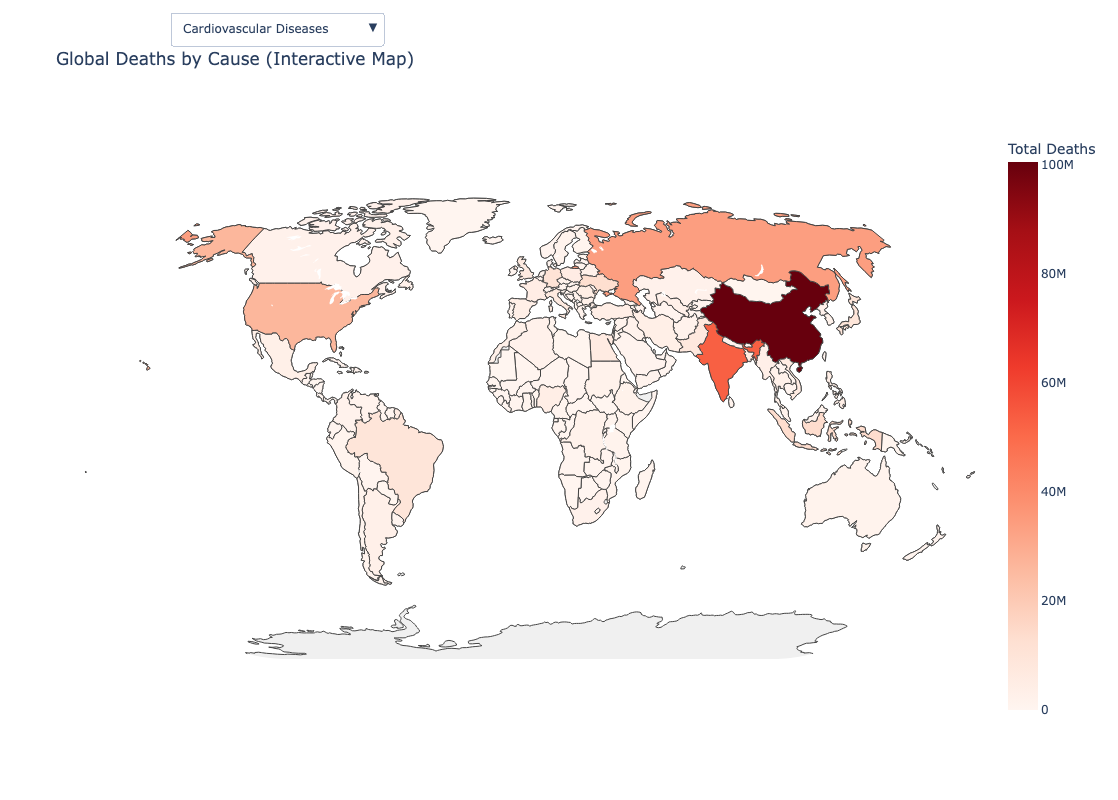

In [212]:
import plotly.graph_objects as go

# Define causes for visualization
selected_causes = ["Cardiovascular Diseases", "Neoplasms", "Lower Respiratory Infections", "Neonatal Disorders", "Tuberculosis"]

# Create a dropdown interactive world map with larger size
fig = go.Figure()

for cause in selected_causes:
    fig.add_trace(go.Choropleth(
        locations=death_data["Country/Territory"],
        locationmode="country names",
        z=death_data[cause],
        colorscale="Reds",
        colorbar_title="Total Deaths",
        visible=(cause == "Cardiovascular Diseases"),  # Show only the first map initially
        name=cause
    ))

# Increase map size and improve layout
fig.update_layout(
    title_text="Global Deaths by Cause (Interactive Map)",
    geo=dict(projection_type="natural earth", showframe=False, showcoastlines=True, 
             lakecolor="rgb(255, 255, 255)", landcolor="rgb(240, 240, 240)"),
    updatemenus=[
        dict(
            buttons=[
                dict(label=cause,
                     method="update",
                     args=[{"visible": [cause == selected for selected in selected_causes]}])
                for cause in selected_causes
            ],
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        )
    ],
    autosize=False,
    width=1000,  # Increase width
    height=800   # Increase height
)

# Show interactive map
fig.show()


#### Global Distribution of Deaths by Cause

- **The map visualizes the number of deaths per country** for selected causes, helping identify regions with **high mortality rates**.  

#### Cause-Specific Mortality Trends:
- Users can **switch between different causes** (**Cardiovascular Diseases, Neoplasms, Lower Respiratory Infections, Neonatal Disorders, and Tuberculosis**) to see how different diseases impact various countries.  

#### High-Risk Areas:
- Countries with the **darkest red shades** indicate the **highest number of deaths** for the selected cause, highlighting **regions with severe health challenges**.  

#### Comparative Analysis:
- The **dropdown menu** allows users to **compare different diseases**, revealing patterns such as:  
  ✔ **Cardiovascular diseases** being the **leading cause in most developed nations**.  
  ✔ **Tuberculosis** being **more prevalent in developing regions**.  
  ✔ **Neonatal disorders** affecting **countries with limited healthcare access**.  

#### Global Health Insights:
- The map can be used to **assess the burden of diseases worldwide**, informing **public health policies and research priorities**.  

#### Real-time Data Visualization:
- The **interactive nature of the map** ensures that users can **explore mortality trends dynamically**, improving **data-driven decision-making**.  

## Global Causes of Death - Treemap Visualization

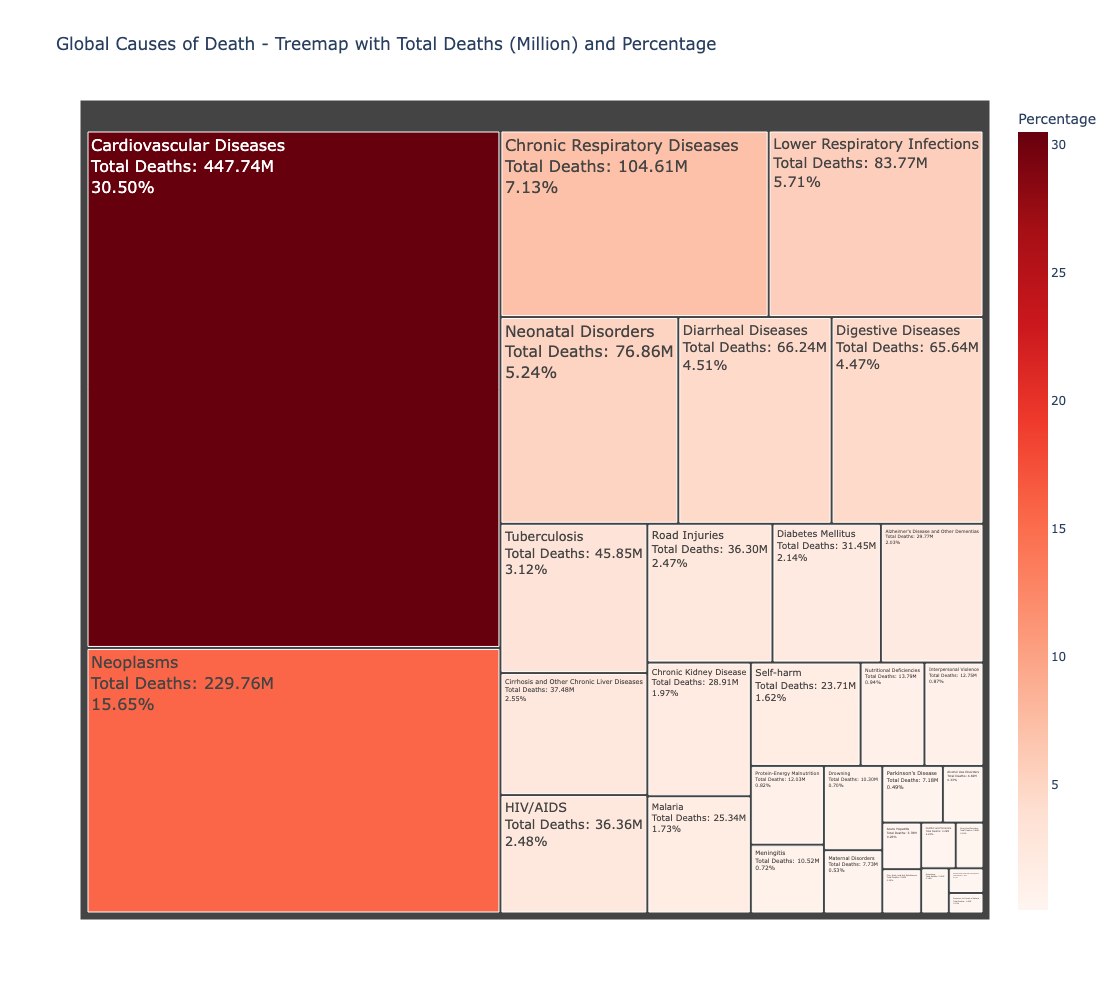

In [216]:
# Convert Total Deaths to millions
# Calculate percentage for each cause
cause_totals = df[cause_columns].sum().reset_index()
cause_totals.columns = ["Cause of Death", "Total Deaths"]
cause_totals["Percentage"] = (cause_totals["Total Deaths"] / cause_totals["Total Deaths"].sum()) * 100


cause_totals["Total Deaths (Million)"] = cause_totals["Total Deaths"] / 1e6

# Creating a Treemap visualization with Total Deaths in Million and Percentage displayed
fig = px.treemap(
    cause_totals,
    path=["Cause of Death"],
    values="Percentage",  # Use percentage for better representation
    title="Global Causes of Death - Treemap with Total Deaths (Million) and Percentage",
    color="Percentage",
    color_continuous_scale="Reds",
    hover_data={"Total Deaths (Million)": ":.2f", "Percentage": ":.2f%"}  # Show total deaths in million and percentage on hover
)

# Update Treemap text properties for better readability
fig.update_traces(
    textinfo="label+text+value",  # Show category, total deaths in million, and percentage directly on plot
    texttemplate="%{label}<br>Total Deaths: %{customdata[0]:.2f}M<br>%{value:.2f}%",  # Display total deaths in million and percentage
    textfont_size=16  # Increase font size for clarity
)

# Increase the size of the Treemap for better visualization
fig.update_layout(
    autosize=False,
    width=1000,  # Larger width
    height=1000,  # Larger height
    paper_bgcolor="white"  # White background for better contrast
)

# Show the Treemap
fig.show()


### Treemap Visualization: Global Causes of Death Distribution

- This code generates a **Treemap visualization** that represents the **percentage distribution of different causes of death worldwide**.  
- Each **cause of death** is displayed as a **proportional rectangle**, where **larger rectangles** indicate causes with **higher mortality percentages**.  
- The **color intensity follows a red gradient**, with **darker shades representing higher death percentages**.  

### Interactive Features:
- The **interactive treemap** allows users to **hover over each section** to view additional details, such as:
  
  ✔ **Total number of deaths** for each cause.  
  ✔ **Exact percentage contribution** of each cause to global mortality.  

### Insights & Impact:
- This **visualization helps identify the leading causes of death globally**, providing insights into:  
  ✔ **Public health priorities**.  
  ✔ **Areas requiring urgent intervention**.  
  ✔ **The overall burden of non-communicable and communicable diseases worldwide**.  

## Global Deaths by Country

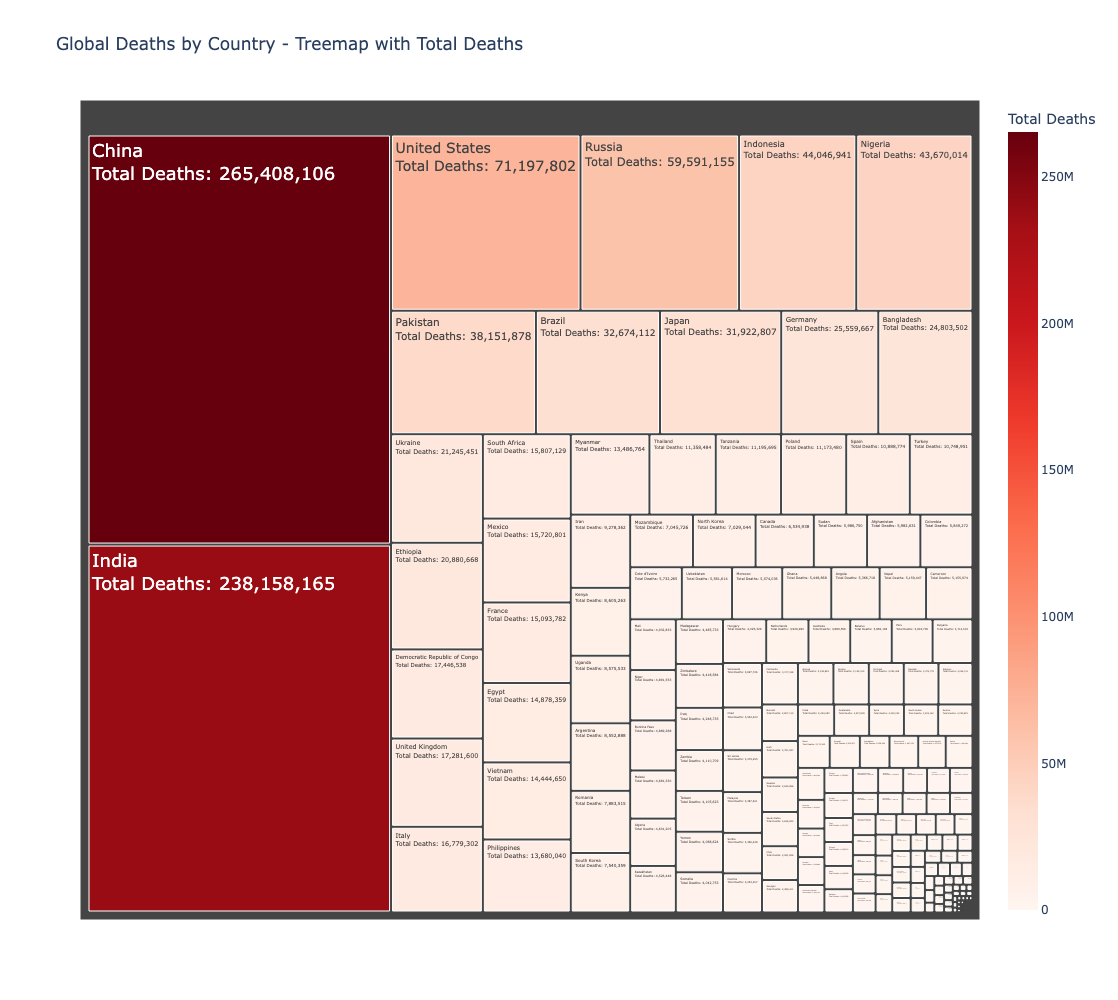

In [220]:

# Reload the dataset to include country-wise total deaths
df = pd.read_csv("cause_of_deaths.csv")

# Summing up total deaths for each country across all causes
country_deaths = df.groupby("Country/Territory")[df.columns[3:]].sum().reset_index()

# Calculate the total deaths per country
country_deaths["Total Deaths"] = country_deaths.iloc[:, 1:].sum(axis=1)

# Create an interactive Treemap visualization showing countries with total deaths
fig = px.treemap(
    country_deaths,
    path=["Country/Territory"],
    values="Total Deaths",  # Use total deaths per country
    title="Global Deaths by Country - Treemap Representation",
    color="Total Deaths",
    color_continuous_scale="Reds",
    hover_data={"Total Deaths": ":,.0f"}  # Show only total deaths in hover
)

# Update text settings to show country name directly on the plot
fig.update_traces(
    textinfo="label+text+value",  # Display country name on the plot
    texttemplate="%{label}<br>Total Deaths: %{value:,.0f}",
    textfont_size=18  # Increase font size for better readability
)

# Increase the size of the Treemap for better visualization
fig.update_layout(
    autosize=False,
    width=1000,  # Increased width
    height=1000,  # Increased height
    title_text="Global Deaths by Country - Treemap with Total Deaths"
)

# Show the updated Treemap
fig.show()



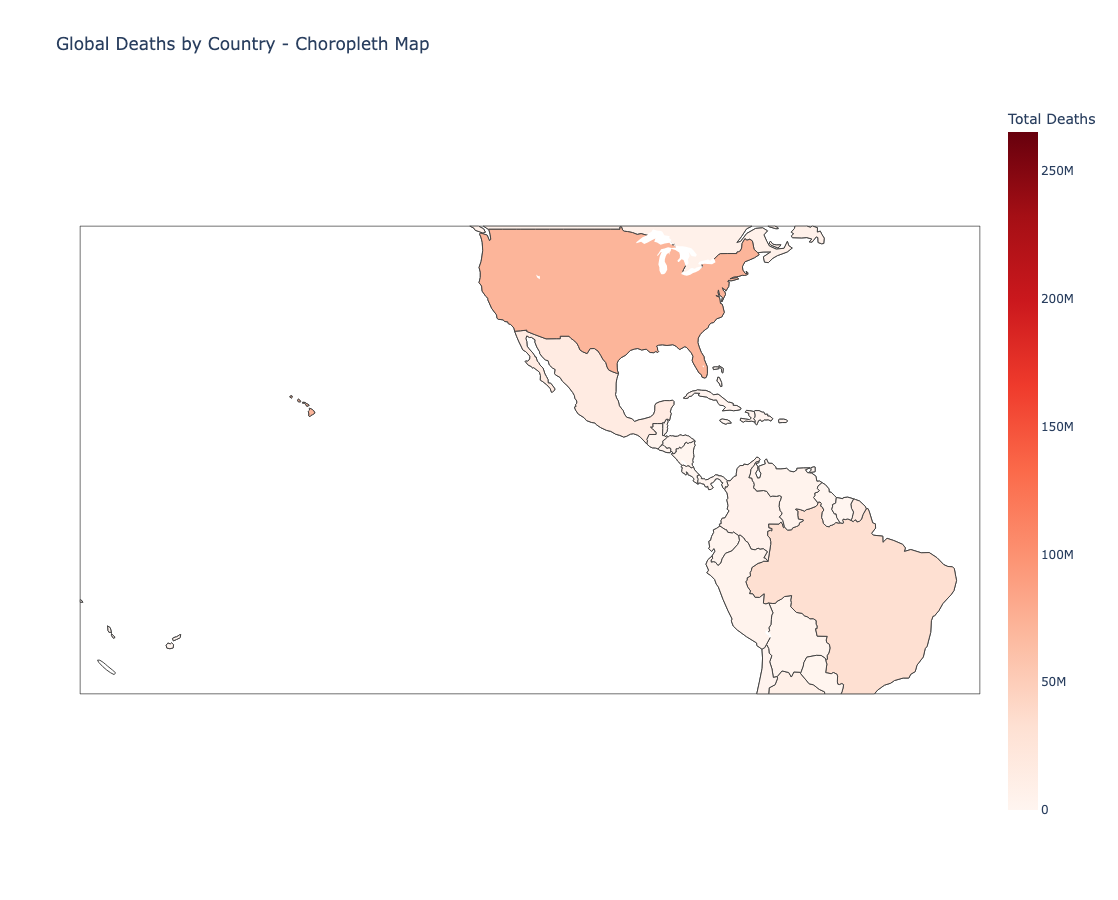

In [222]:
# Reload the dataset
df = pd.read_csv(file_path)

# Summing up total deaths for each country across all causes
country_deaths = df.groupby("Country/Territory")[df.columns[3:]].sum().reset_index()

# Calculate the total deaths per country
country_deaths["Total Deaths"] = country_deaths.iloc[:, 1:].sum(axis=1)

# Creating a Choropleth map with a larger display size
fig = px.choropleth(
    country_deaths,
    locations="Country/Territory",
    locationmode="country names",
    color="Total Deaths",
    hover_name="Country/Territory",
    title="Global Deaths by Country - Choropleth Map",
    color_continuous_scale="Reds",
    projection="natural earth"  # Using a natural Earth projection
)

# Update layout for a larger display size and better visualization
fig.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="white"),
    paper_bgcolor="white",
    width=1000,  # Increased width
    height=900   # Increased height
)

# Show the Choropleth Map
fig.show()


#### Treemap Visualization: Global Death Distribution by Country

- This **treemap visualization** represents the **total number of deaths per country across all causes**, providing an **intuitive way to compare mortality rates globally**.  
- Each **country is represented as a proportional rectangle**, where the **size corresponds to the total number of deaths recorded** for that country.  

#### Visualization Details:
- The **color intensity follows a red gradient**, with **darker shades indicating higher mortality rates**.  
- Users can **hover over each country** to see the **exact number of deaths**.  
- **Country names** are displayed directly on the plot for **better readability**.  

#### Impact & Use:
- This **interactive visualization** allows **researchers, policymakers, and public health officials** to:  
  ✔ **Identify high-risk regions** with the highest mortality burdens.  
  ✔ **Analyze global health trends** and variations across countries.  
  ✔ **Prioritize interventions** in **countries with the highest mortality rates**.  

- The **large plot size ensures clarity**, making it an **effective tool for exploring global death distribution patterns at a glance**.  

## Global Mortality Trends Over Time

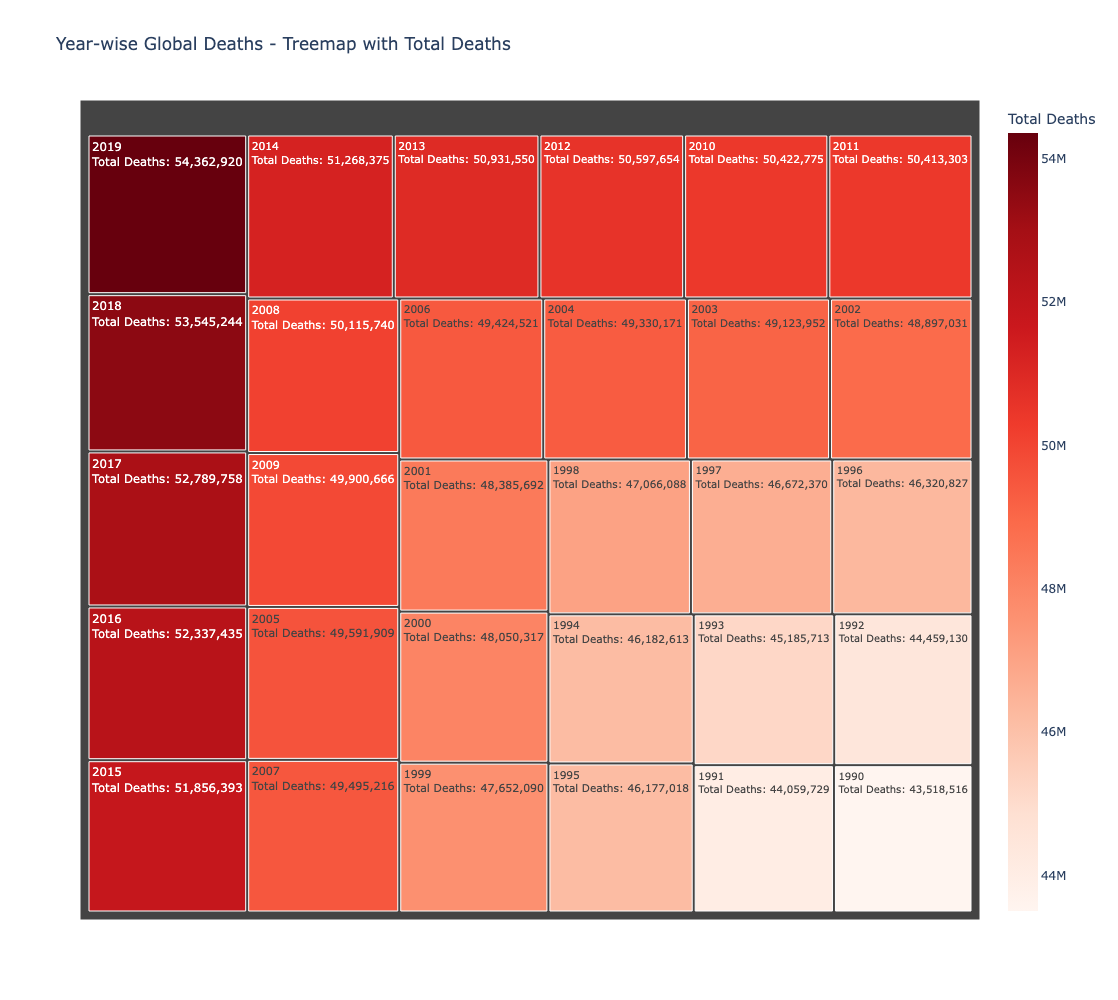

In [226]:
# Re-import necessary libraries since the execution state was reset
import pandas as pd
import plotly.express as px

# Reload the dataset
file_path = "cause_of_deaths.csv"
df = pd.read_csv(file_path)

# Summing up total deaths for each year across all causes
yearly_deaths = df.groupby("Year")[df.columns[3:]].sum().reset_index()

# Calculate the total deaths per year
yearly_deaths["Total Deaths"] = yearly_deaths.iloc[:, 1:].sum(axis=1)

# Create an interactive Treemap visualization showing year-wise total deaths
fig = px.treemap(
    yearly_deaths,
    path=["Year"],
    values="Total Deaths",  # Use total deaths per year
    title="Year-wise Global Deaths - Treemap Representation",
    color="Total Deaths",
    color_continuous_scale="Reds",
    hover_data={"Total Deaths": ":,.0f"}  # Show only total deaths in hover
)

# Update text settings to show year directly on the plot
fig.update_traces(
    textinfo="label+text+value",  # Display year name on the plot
    texttemplate="%{label}<br>Total Deaths: %{value:,.0f}",
    textfont_size=18  # Increase font size for better readability
)

# Increase the size of the Treemap for better visualization
fig.update_layout(
    autosize=False,
    width=1000,  # Increased width
    height=1000,  # Increased height
    title_text="Year-wise Global Deaths - Treemap with Total Deaths"
)

# Show the updated Treemap
fig.show()


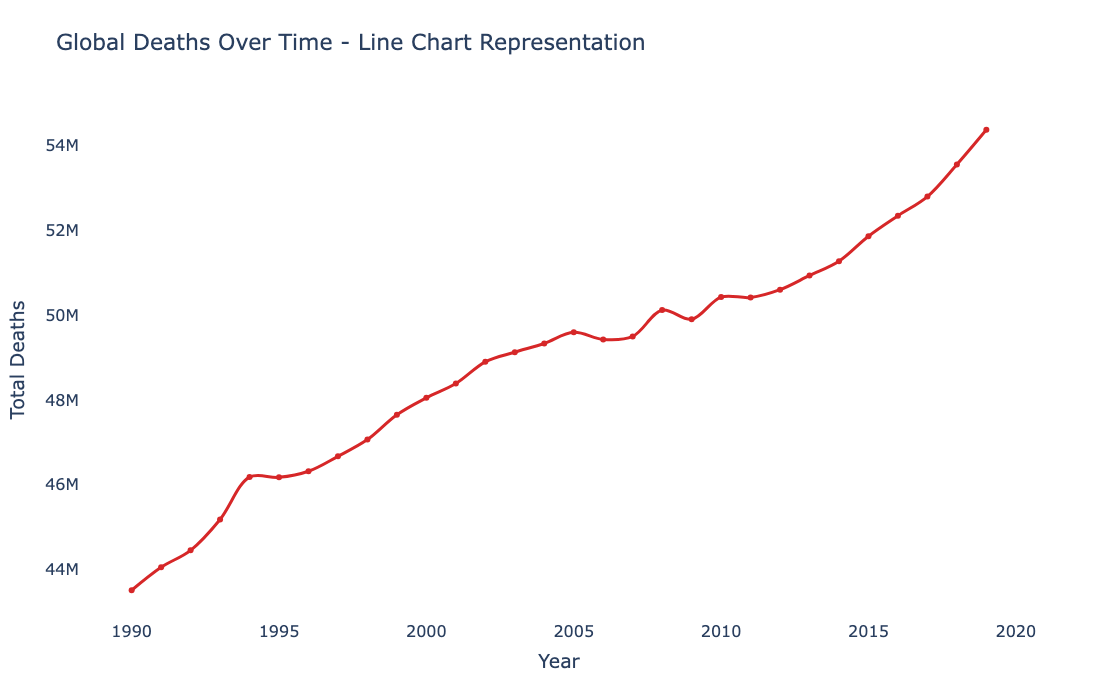

In [228]:
# Re-import necessary libraries since the execution state was reset
import pandas as pd
import plotly.express as px

# Reload the dataset
file_path = "cause_of_deaths.csv"
df = pd.read_csv(file_path)

# Summing up total deaths for each year across all causes
yearly_deaths = df.groupby("Year")[df.columns[3:]].sum().reset_index()

# Calculate the total deaths per year
yearly_deaths["Total Deaths"] = yearly_deaths.iloc[:, 1:].sum(axis=1)

# Creating an Interactive Line Chart to show total deaths over time
fig = px.line(
    yearly_deaths,
    x="Year",
    y="Total Deaths",
    title="Global Deaths Over Time - Line Chart Representation",
    markers=True,  # Add markers for better visualization
    line_shape="spline",  # Smooth curves for better aesthetics
    color_discrete_sequence=["#D62728"],  # Professional color (dark red)
    hover_data={"Total Deaths": ":,.0f"}  # Show total deaths formatted with commas
)

# Improve layout and readability
fig.update_traces(line=dict(width=3))  # Thicker line for better visibility
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Deaths",
    width=1000,  # Large width
    height=700,  # Optimal height
    paper_bgcolor="white",
    plot_bgcolor="white",
    font=dict(size=16)  # Improve font size for readability
)

# Show the Line Chart
fig.show()


#### Treemap Visualization: Global Mortality Trends Over Time

- This **treemap visualization** represents the **total number of deaths per year across all causes**, allowing users to **explore trends in global mortality over time**.  
- Each **year is displayed as a proportional rectangle**, where the **size corresponds to the total number of deaths recorded in that year**.  

#### Visualization Details:
- The **color intensity follows a red gradient**, with **darker shades indicating higher mortality rates** in specific years.  
- Users can **hover over each year** to see the **exact number of deaths**.  
- **Year labels** are displayed directly on the plot for **better readability**.  

#### Insights & Applications:
- This **interactive visualization** helps in **identifying mortality trends over time**, such as:  
  ✔ **Increases in deaths due to pandemics, wars, or other global health crises**.  
  ✔ **Fluctuations in mortality rates that may reflect public health improvements or disease outbreaks**.  
  ✔ **Healthcare interventions and their impact across different time periods**.  

- **By analyzing yearly fluctuations**, policymakers and researchers can gain valuable insights into **public health improvements, emerging health threats, and long-term mortality trends worldwide**.  

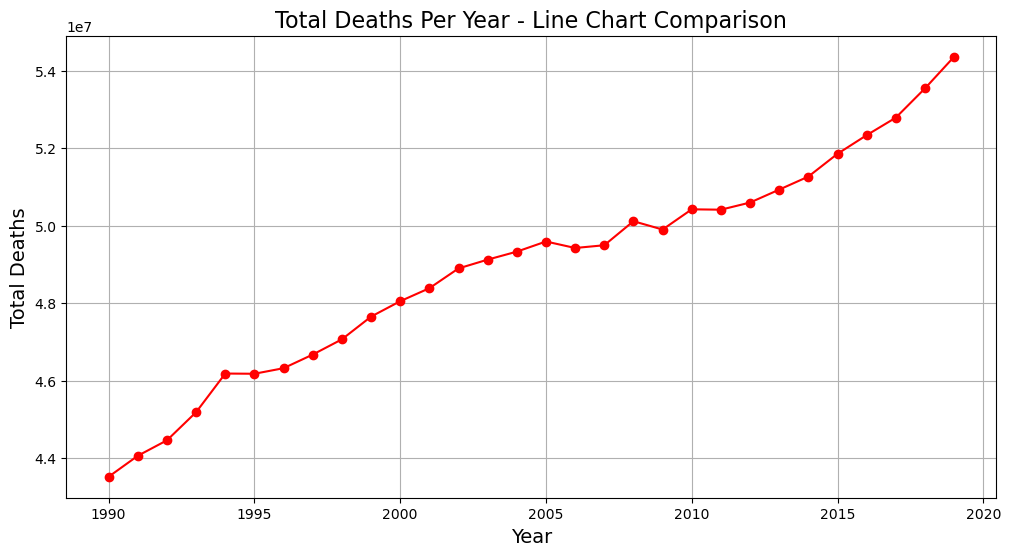

In [231]:
import matplotlib.pyplot as plt

# Sort the data by year
yearly_deaths = yearly_deaths.sort_values(by="Year")

# Create a line chart to compare yearly total deaths
plt.figure(figsize=(12, 6))
plt.plot(yearly_deaths["Year"], yearly_deaths["Total Deaths"], marker="o", linestyle="-", color="red")

# Labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.title("Total Deaths Per Year - Line Chart Comparison", fontsize=16)
plt.grid(True)

# Show the plot
plt.show()


The line chart shows a steady increase in total deaths per year from 1990 to 2020, with significant surges around the mid-1990s and post-2010. A brief stabilization period occurred between 2000-2010, followed by a sharp rise, especially from 2015 to 2020, likely due to aging populations, pandemics, or health crises. Minor fluctuations indicate temporary improvements or external influences on mortality rates. The overall trend highlights the growing global health burden, emphasizing the need for preventive healthcare measures and policy interventions.

In [235]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
file_path = "cause_of_deaths.csv"
df = pd.read_csv(file_path)

# Extract relevant columns (excluding country, code, and year)
disease_columns = df.columns[3:]

# Summing up deaths for each country across all diseases
df["Total Deaths"] = df[disease_columns].sum(axis=1)

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Top 10 Deadliest Diseases by Country", style={'textAlign': 'center'}),
    
    # Dropdown to select country
    html.Label("Select a Country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': c, 'value': c} for c in df['Country/Territory'].unique()],
        value=df['Country/Territory'].unique()[0],
        clearable=False
    ),
    
    # Bar chart to show the top 10 deadliest diseases
    dcc.Graph(id='top-diseases-bar')
])

# Callback to update the bar chart dynamically
@app.callback(
    Output('top-diseases-bar', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_chart(selected_country):
    # Filter data based on selected country
    country_data = df[df['Country/Territory'] == selected_country]
    
    # Summing up deaths by disease for the selected country
    disease_totals = country_data[disease_columns].sum().reset_index()
    disease_totals.columns = ["Disease", "Total Deaths"]
    
    # Get the top 10 deadliest diseases
    top_diseases = disease_totals.nlargest(10, "Total Deaths")
    
    # Create a bar chart for the top 10 deadliest diseases
    bar_fig = px.bar(
        top_diseases,
        x="Disease",
        y="Total Deaths",
        title=f"Top 10 Deadliest Diseases in {selected_country}",
        text_auto=True,
        color="Total Deaths",
        color_continuous_scale="Reds"
    )
    bar_fig.update_traces(textposition='outside')
    
    return bar_fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

This Dash-based interactive visualization represents the Top 10 Deadliest Diseases by Country using a bar chart. The user can select a country from the dropdown menu, and the application dynamically updates the bar chart to display the top 10 diseases causing the highest number of deaths in that country. The dataset aggregates death counts for various diseases across different countries. The visualization uses a color-coded bar chart with the intensity of red indicating the severity of mortality for each disease. This tool helps analyze country-specific health burdens, identify major causes of death, and assist policymakers in prioritizing public health interventions.

### Concusion:

The overall analysis of global mortality trends highlights significant variations in causes of death across different regions and time periods. Through data visualization techniques such as stacked area plots, treemaps, and choropleth maps, we identified key health challenges, including the dominance of non-communicable diseases (e.g., cardiovascular diseases and cancer) in developed nations, while communicable diseases (e.g., tuberculosis and neonatal disorders) remain more prevalent in developing regions. The clustering and PCA analysis further classified countries into distinct mortality patterns, enabling a deeper understanding of how various diseases impact global populations differently. Additionally, the interactive dashboard provided an intuitive way to explore cause-specific mortality trends and identify high-risk areas, aiding in public health decision-making.

In forecasting future mortality trends, we compared ARIMA and Linear Regression models, where ARIMA demonstrated superior predictive accuracy with lower RMSE and MAE values, making it the preferred model for time-series forecasting. The steady increase in global deaths per year, as shown in the trend analysis, emphasizes the growing burden of non-communicable diseases, likely due to aging populations and lifestyle-related factors. This analysis underscores the need for proactive health policies, resource allocation, and targeted interventions to mitigate the rising mortality rates from chronic diseases while continuing efforts to control infectious diseases in vulnerable regions. Moving forward, integrating hybrid models and advanced AI-driven forecasting can further refine predictive accuracy and support global health initiatives.